In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

In [3]:
x = StandardScaler().fit_transform(X)

In [4]:
pca = PCA(n_components=2) # Choose the desired number of components
principalComponents = pca.fit_transform(x)

In [5]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

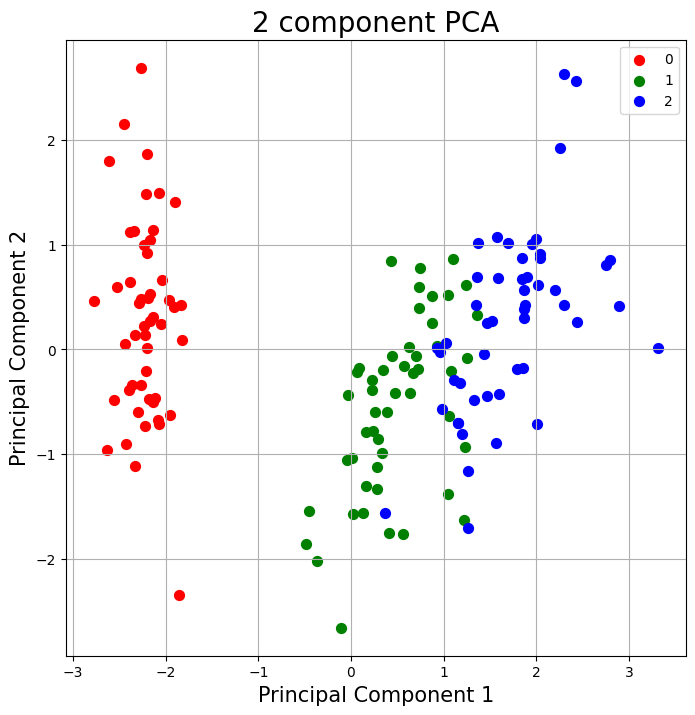

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


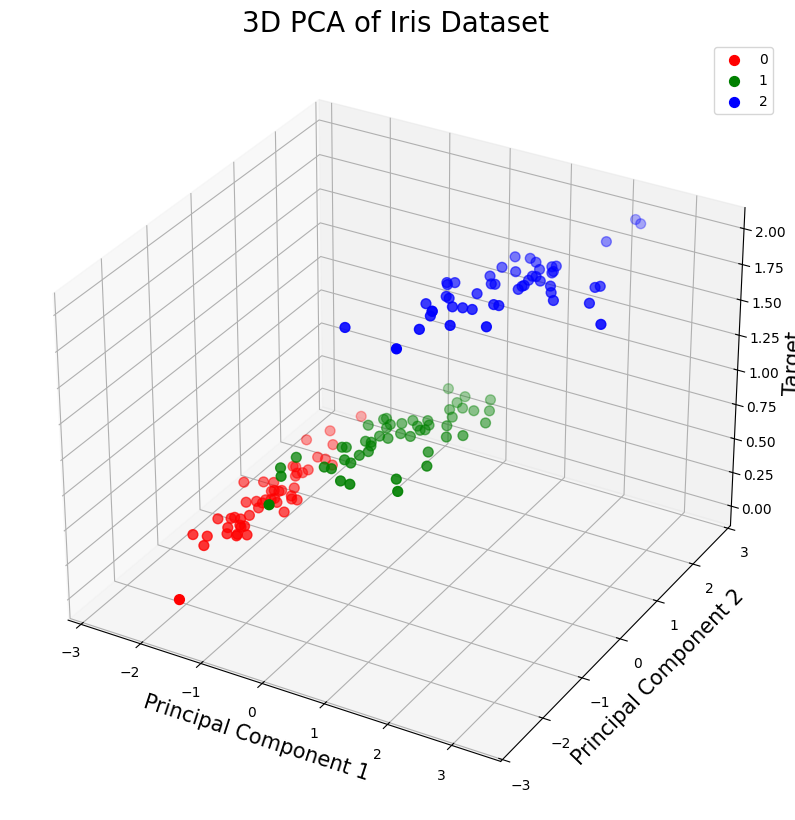

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 'finalDf' from the previous steps

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'target'],  # Using 'target' as the z-axis
               c=color,
               s=50)

ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Target', fontsize=15)  # Labeling the z-axis
ax.set_title('3D PCA of Iris Dataset', fontsize=20)
ax.legend(targets)
plt.show()